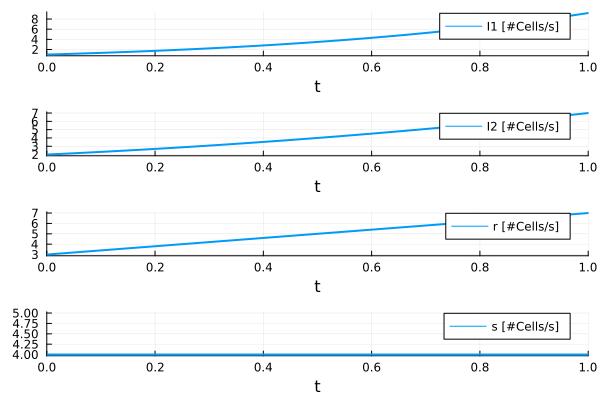

In [1]:
using DifferentialEquations
using Plots

function lotka_volterra!(dx, x, gα, t)
    # x is a vector of the densities of the cell lines in the model
  
  i1, i2, r, s  = x
    
        # i1 is the density of the anti-oncogenic cell population. These cells are T cells and helper T cells 
        # i2 is the density of  density of the  pro-oncogenic cell population. These cells are Regulatory T cells, macrophages, and myeloid-derived suppressor cells. 
        # r is the  density of the population of cancer cells resistant to treatment.
        # s is the  density of the population of cancer cells sensitive to treatment.

    # g are the instrinsic growth rates of the cells
    
  # [g1, g2, gr, gs] = g
        #g1 is the anti-oncogenic cells intrinsic growth rate.
        #g2 is the pro-oncogenic cells intrinsic growth rate.  
        #gr is the intrinsic growth rate of the resistant cancer cells.
        #gs is the intrinsic growth rat of the sensitive cancer cells.
    
    # αi_j is the in the growth fatcor and interaction coefficient matrix for
    # the interaction coefficients for the species "I1","I2","r", and "s".    
    
  # [α1_1 α1_2 α1_3 α1_4 ; α2_1 α2_2 α2_3 α2_4; α3_1 α3_2 α3_3 α3_4; α4_1 α4_2 α4_3 α4_4 = αi_j

        # The i subscript describes the row where the coefficient  is located in the matrix, 
        # and the j subscript denotes the column of the matrix. Each, row and column corresponds
        # to a species interaction. Where the the row and columns sequence of the matrix is,
        # i1, i2, r, and s. For example, the alpha 1,2 is the interaction antioncogenic 
        # cells (I1) have on the pro-oncogenic cells (I2).
    
    # Then gα is 5X4 matrix, whose first row is comprised of the groeth fatcros "g" and rows 2 thorugh 5 
    # are the interactions coefficients from matrix αi_j. 
    
  g1, g2, gr, gs, α1_1, α1_2, α1_3, α1_4, α2_1, α2_2, α2_3, α2_4, α3_1, α3_2, α3_3, α3_4, α4_1, α4_2, α4_3, α4_4,  = gα
    
  dx[1] = di1 = g1*i1 + (i1*α1_1 + i2*α1_2 + r*α1_3 + s*α1_4) 
  dx[2] = di2 = g2*i2 + (i1*α2_1 + i2*α2_2 + r*α2_3 + s*α2_4)
  dx[3] = dr  = gr*r  + (i1*α3_1 + i2*α3_2 + r*α3_3 + s*α3_4)
  dx[4] = ds  = gs*s  + (i1*α4_1 + i2*α4_2 + r*α4_3 + s*α4_4)
end
# i1₀ density for the anti-oncogenic cell population at t₀ = 0.
i1₀ = 1;
# i2₀ density for the pro-oncogenic cell population at t₀ = 0.
i2₀ = 2;
# r₀  density for the population of cancer cells resistant to treatment at t₀ = 0.
r₀  = 3;
# s₀  density for the population of cancer cells sensitive to treatment at t₀ = 0. 
s₀  = 4;
# x₀  initial condition of all cell populations at t₀ = 0. 
x₀ = [i1₀,i2₀,r₀,s₀];
# tspan is the time interval 
tspan = (0.0,1.0)
# In this case the growth rate of all cells is set to one and there is no interaction among cell populations in gα 
gα = vcat(ones(4)' ,zeros(4, 4));

prob = ODEProblem(lotka_volterra!,x₀,tspan,gα)
sol = solve(prob)

plot(sol,linewidth=2,xaxis="t",label=["I1 [#Cells/s]" "I2 [#Cells/s]" "r [#Cells/s]" "s [#Cells/s]"],layout=(4,1))
